# More Python / Numerical Python



In [1]:
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import pylab
import sys; sys.path.append('/home/a180i/lib/python/')
import a180
import os
print('done')

done


## Index arrays

Sometimes we want to access only certain elements in a Python array.  We have seen some aspects of indexing before, for example, using the square brackets to access a single element or a range of elements:

In [2]:
x = np.array(['cat', 'dog', 'parrot', 'pig', 'hamster', 'horse', 'snake', 'tarantula'])
print(x[0])
print(x[3]) # remember indexing counts from 0
print(x[2:5]) # elements 2, 3, and 4

cat
pig
['parrot' 'pig' 'hamster']


However, sometimes we want to access non-contiguous sets of elements.  This is where index arrays come in.  An index array is a numpy array of indices.  (For n-dimensional arrays, it is a tuple of 1d numpy arrays; more later.)  We can then use the index array in the square brackets to get the elements in question.

In [3]:
ix = np.array([1,3,5]) # an index array
print(x[ix])

['dog' 'pig' 'horse']


We can even use them for assignment.

In [4]:
x[ix] = 'frog'
print(x)

['cat' 'frog' 'parrot' 'frog' 'hamster' 'frog' 'snake' 'tarantula']


## 2-d index arrays

We can use index arrays for 2d numpy arrays as well.  This structure is a tuple of arrays of 1d indices.

In [5]:
x = np.array(['cat', 'dog', 'parrot', 'pig', 'hamster', 'horse', 'snake', 'tarantula'])
x.shape = (2,4)
print(x)
ix = (np.array([0,0,0,1]), np.array([0,2,3,3]))
print(x[ix]) # see if you can guess what this will be

[['cat' 'dog' 'parrot' 'pig']
 ['hamster' 'horse' 'snake' 'tarantula']]
['cat' 'parrot' 'pig' 'tarantula']


## Using np.nonzero to get index arrays

We might be interested in finding certain locations where a condition is met.  For example, everywhere in an array that is above a certain threshold.  We use numpy arrays to do the appropriate comparison, which will give us an array of True/False boolean values.  We then use the nonzero function to get all the locations where the condition is True.

In [6]:
x = np.random.randn(5,5) # get a 5x5 array of random values, gaussian distributed with zero mean and sigma=1
print(x)
w = np.nonzero(x > 0.5) # get indices of all the locations above 0.5
print(w) # print the indices
print(x[w]) # print the values.  Note that this is a 1d array of values.

[[-0.65458107  1.85627102 -0.15531378  0.10050925  1.01821992]
 [-0.09756248  1.23510024  1.16588009 -2.38540608  0.30064107]
 [-0.46223444  0.46761126 -0.22896869  0.52552262 -0.33272015]
 [ 0.424902   -0.10157574 -0.41807128  1.81232391  0.85815034]
 [-0.58628975 -1.22741937 -1.51999033  0.40655997  0.70054399]]
(array([0, 0, 1, 1, 2, 3, 3, 4]), array([1, 4, 1, 2, 3, 3, 4, 4]))
[1.85627102 1.01821992 1.23510024 1.16588009 0.52552262 1.81232391
 0.85815034 0.70054399]


## Working with directories and filenames

To combine a directory name and a file name, you can usually do something like 

``combined_filename = directory + filename``

However, what if the directory name does not have a ``/`` at the end? Adding the two variables will give an incorrect file name where the directory name and the file names are joined together. 

The way to avoid this is to use ``os.path.join``. This function will create a string that combines a directory name with a filename, taking care of the ending ``/`` for you. Try it below

In [7]:
directory_name1 = '/data/'
directory_name2 = '/data'
filename1 = 'file1.fits'

# Because one of the directory name is missing a /, the following two lines give different answers
print(directory_name1+filename1)
print(directory_name2+filename1)

# However, if we use os.path.join, you can avoid this bug
print(os.path.join(directory_name1,filename1))
print(os.path.join(directory_name2,filename1))

/data/file1.fits
/datafile1.fits
/data/file1.fits
/data/file1.fits


# Lab 4: Color-Magnitude Diagram


## Basic Data Reduction

One of the first tasks is to reduce all the data frames, namely through the creation of a flat field frames for each filter used, then sky-subtraction and flat-field correction of all target and photometric standard star exposures.


In [8]:
# lists of raw exposures.  Be sure to keep track of which filter they're used for.
import numpy 
data_dir = '/data/home/a180f/lab4_raw/'
reduced_dir = '/data/home/a180f/lab4_proc/'

im_V = fits.getdata(data_dir+'hst_17077_12_wfc3_uvis_f606w_iexu12_drc.fits')
im_R = fits.getdata(data_dir+'hst_17077_12_wfc3_uvis_f814w_iexu12_drc.fits')

im_V = numpy.array(im_V)
im_R = numpy.array(im_R)

#steps done by HST already
# dark exposures (used for calibrating flat field exposures)
# raw flat field exposures
# raw sky exposures
# raw photometric standard star exposures
# raw target exposures

# NOTE:  for the following, save the output into appropriate
#

# create the flat field frames
#

# file names for flat field calibration frames

# for each flat field calibration frame

# load all exposures and combine
    
# normalize by median of combined array

# mark pixels with low or high values as NaN
# thresh = (0.05, 2.5) # low and high thresholds for marking bad values
# w = np.nonzero((flat < thresh[0]) | (flat > thresh[1]))  # note the | symbol does a logical OR operation
# flat[w] = np.nan




# # array of filenames for reduced data
# reduced_filenames_V = FIXME

# # iterate over all the exposures
# for i in arange(len(reduced_filenames_V)):
    
#     # sky subtract and flat-field correct all standard star and target exposures

    
#     # then save each file into the reduced directory
#     fits.writeto(os.path.join(reduced_dir,reduced_filenames_V[i]),)
print('done')
print(np.shape(im_V))
print(np.shape(im_R))

done
(7945, 7946)
(7945, 7946)


## Creating mosaic images

Our aims are to get photometry on stars in the cluster.  Our data, however, are taken at multiple pointings, so stars may show up in one frame and not another.  They might also appear in multiple frames.  To combine our data effectively, we'll want to assign a unique identifier to each star.  And in order to do that, we can first create a combined mosaic image.



In [9]:
#SKIP THIS BLOCK
#create function
def create_mosaic(frame_offsets, filenames, show=False):
    "given a list of frame offsets and filenames, combine the images into a common mosaic frame"

    # compute the dimensions of the mosaic image
    # FIXME  replace im below with a real loaded image frame
    im = fits.getdata(filenames[0])
    im_shape = im.shape  # get the dimensions of the individual exposures (Ny, Nx)
    mos_shape = im_shape + np.max(frame_offsets_V, axis=0)  # dimensions of mosaic array    
    
    
    # create mosaic
    mos = np.zeros(mos_shape, dtype=np.float) + np.nan  # will hold mosaic array; initialize with NaN values
    counter = np.zeros(mos_shape, dtype=np.int)  # will hold number of images contributing to pixel; used later in averaging
    # accumulate images into mosaic frame
    for i, fn in enumerate(filenames):  # loop over calibrated V-band exposures
        im = fits.getdata(fn)  # load the image data from FITS       
                
        # process the image data (if necessary)
        pim = im # TEMP
        
        

        tempmos = mos[frame_offsets[i][0]:frame_offsets[i][0] + im_shape[0],
                      frame_offsets[i][1]:frame_offsets[i][1] + im_shape[1]]
        
        addmos = np.nansum(np.dstack((tempmos, pim)), 2)
        
        mos[frame_offsets[i][0]:frame_offsets[i][0] + im_shape[0],
            frame_offsets[i][1]:frame_offsets[i][1] + im_shape[1]] = addmos
        
        # increase the counter for where this image is placed
        counter[frame_offsets[i][0]:frame_offsets[i][0] + im_shape[0],
                frame_offsets[i][1]:frame_offsets[i][1] + im_shape[1]] += 1        
        
        
    # now divide by number of images to get the average
    w = np.nonzero(counter)
    mos[w] /= counter[w]

    # display the mosaic
    if show:
        pass  # replace with plotting code
    
    # return the mosiac
    return mos

# Just run this cell to load in the mosaic code


print('done')

done


In [10]:
#SKIP
# create V-band mosaic

# This should be a list of (y, x) pairs for the offsets of each of the V-band exposures
#  NOTE  you will have to determine these
#  NOTE  it will probably be best if you have a consistent set of offsets among all filters so that the a given star appears in the same location in each mosaic
# frame_offsets_V = [(FIXME, FIXME),
#                    (FIXME, FIXME),
#                    (FIXME, FIXME),
#                   ]
# frame_offsets_V = np.array(frame_offsets_V)

# # create the mosaic
# mos_V = create_mosiac(frame_offsets_V, calib_frames_V, show=True)

# # save the mosaic to file
# mosaic_savefile_V = FIXME
# fits.writeto(os.path.join(reduced_dir,mosaic_savefile_V),mos_V)

# Now repeat this for other filters
#

In [11]:
#SKIP
# after the previous steps and the data is saved, do you do not need to reduced the data again 
# everytime you run your notebook. You can just load in your files here

# uncomment and change to load in the saved files instead of recreating the mosaic each time

# reduced_dir = ('/data/home/a180f/lab4_raw/')
# mosaic_savefile_V = ('hst_17077_12_wfc3_uvis_f606w_iexu12_drc.fits')
# mos_V = fits.getdata(os.path.join(reduced_dir, mosaic_savefile_V)

## Identifying the stars

We'll want a method for identifying stars so that we can assign each a unique identifier.  We only really need to identify stars for which we can get detections in all bands.

We can make the identifications in the mosaic frame.  However, when we do photometry, we should try (if possible) to do it in each target exposure, then later combine the photometry.

We'll want a robust way of automatically identifying stars.  This could be done by first smoothing the image then identifying the peaks.  However, we have the confounding factor of cosmic ray hits.  (Note that they could be posive or negative, since we subtracted sky exposures.)  So we will first want to identify all the cosmic rays.  Then we can tag them with NaN values just as we did with bad pixels in the calibration steps above.  Finally, we can, for the identification steps, replace the NaN values with a combination of good values from the pixels' neighbors.

In [12]:
# NOTE doing cosmic ray removal can take a really long time! 
# It's okay to skip this step if you took more than 1 image at each mosaic position and 
# you median combined them

from scipy.ndimage import median_filter, percentile_filter, gaussian_filter

def median_replace(im, medfilt=5):
    "replace NaN values with those determined from a local median filter"
    
    mfim = median_filter(im, size=medfilt,
                         #mode='constant',
                         cval=0.)

    # get locations where value is NaN
    w = np.isnan(im)
    # replace those locations in the image with values from the median-filtered image
    pim = im.copy()
    pim[w] = mfim[w]
    
    return pim


def identify_cr(im, thresh=10.):
    """
    return an index array of pixels flagged to be possible cosmic-ray hits.  
    thresh gives a factor fow how many times above (or below) the local background 
    sigma a pixel must be to be flagged.
    """

    # do a high-pass filter to take out "sky" variations
    skyfilt = 50 # [pix]
    sfim = im - median_filter(im, size=skyfilt,
                              #mode='constant',
                              cval=0.)

    
    
    # estimate the local image sigma.  Don't use standard deviation, since that will be biased by CRs.
    # Instead, use rank filters
    sigfilt = 10 # [pix]
    pf1 = percentile_filter(sfim, 50-34.1, size=sigfilt,
                            cval=0.)
    pf2 = percentile_filter(sfim, 50+34.1, size=sigfilt,
                            cval=0.)
    sig = (pf2-pf1)/2. # half dist. between locations of 1-sig confidence

    
    # now patch over NaNs with a median-filtered image
    medfilt = 5 # [pix]
    tsfim = median_replace(sfim, medfilt=medfilt)
    
    
   
    bad = (tsfim > tsfim + thresh*sig) | (tsfim < tsfim - thresh*sig)
    
####################### Most likely will need to call thresh at a lower value, like 3 ########################
    
    
    
    
    return np.nonzero(bad)


# use the above routines to identify CR values in the mosaics and mark them with NaN

# this can be very slow! Only run this if you find your data has too many cosmic rays.
data_dir = '/data/home/a180f/lab4_raw/'
reduced_dir = '/data/home/a180f/lab4_proc/'

im_V = fits.getdata(data_dir+'hst_17077_12_wfc3_uvis_f606w_iexu12_drc.fits')
mos_V = median_replace(im_V)

# then replace all NaN values with median-filtered values. You can run this step even if you don't run
# the cosmic ray removal to get rid of NaNs

im_R = fits.getdata(data_dir+'hst_17077_12_wfc3_uvis_f814w_iexu12_drc.fits')
mos_R = median_replace(im_R)
print('done')

done


In [13]:
print(np.shape(mos_R))
print(np.shape(mos_V))

(7945, 7946)
(7945, 7946)


Now we should have clean mosaics in which we can identify stars.

To identify the stars automatically, we can first smooth by a Gaussian (to approximate the response of the imaging system to a point-like star, and reject noise that doesn't look like a star), then identify the peaks above a threshold.

Choose to identify in only one filter, such that those stars are detected in all filters and we don't have to do complicated cross-matching.

At the end of this identification step, we want to have in-hand a list of stellar $(x,y)$ positions in the mosaic frame.

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


528 stars detected


<IPython.core.display.Javascript object>


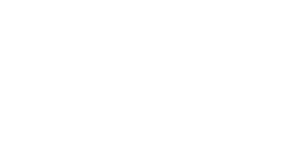

In [14]:
# filter the image with a gaussian
%pylab notebook
############## This needs to be small to avoid overlaps between stars ########################

psf_sig = 3 # [pix]  FIXME  adjust this to an appropriate value commensurate with the width of a star in the image

##################################################################################################


filtered_mosaic = gaussian_filter(mos_V, sigma=psf_sig) # apply the filter

# identify peaks in the image
from scipy.ndimage import maximum_filter
max_filt = int(2.35*psf_sig) # [pix] size of maximum filter
mim = maximum_filter(filtered_mosaic, size=max_filt)  # perform maximum filter


############################################################################################################

#ispeak = ((filtered_mosaic == mim) & (mosaic != 0.)) # value is equal to peak, but isn't zero in original mosaic

########## extra constraint for the peaks to avoid non-stars ################################

ispeak = ((filtered_mosaic == mim) & (filtered_mosaic != 0.) & (mim >= 10))

############## might need to adjust mim ##########################################


# now turn these into a list
peaklocs = np.nonzero(ispeak) # this is a 2-tuple of 1d arrays
starpos_mos_V = np.array(peaklocs).T # this is now an array of N stars by 2
N_star_V = starpos_mos_V.shape[0]
print("{} stars detected".format(N_star_V)) #Fix n_star

# show the mosaic and overlay the detections
# set up the figure
fig = pylab.figure()
ax = fig.add_subplot(111)

# show the mosaic
ax.imshow(mos_V,origin='lower',vmin=0,vmax=100)

# annotate the star detections
for i in range(N_star_V):
    x, y = starpos_mos_V[i,:]
    # draw a circle centered at this location
    
    # write the star number
    ax.text(x, y, i,
            horizontalalignment='center',
            verticalalignment='center',
            )

pylab.draw()
pylab.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
380 stars detected


<IPython.core.display.Javascript object>


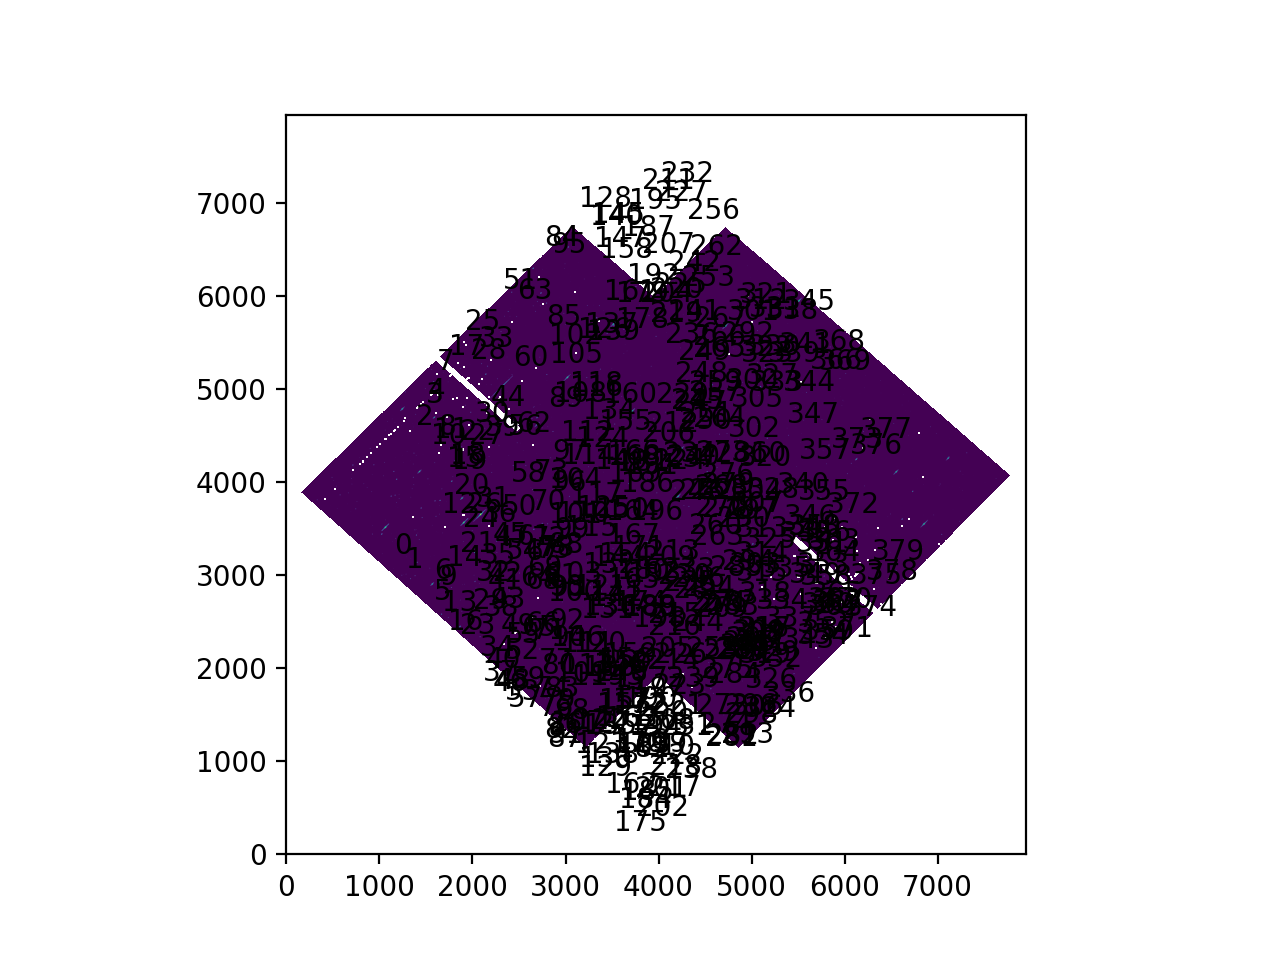

In [15]:
# R BAND
%pylab notebook
############## This needs to be small to avoid overlaps between stars ########################

psf_sig = 3 # [pix]  FIXME  adjust this to an appropriate value commensurate with the width of a star in the image

##################################################################################################


filtered_mosaic = gaussian_filter(mos_R, sigma=psf_sig) # apply the filter

# identify peaks in the image
from scipy.ndimage import maximum_filter
max_filt = int(2.35*psf_sig) # [pix] size of maximum filter
mim = maximum_filter(filtered_mosaic, size=max_filt)  # perform maximum filter


############################################################################################################

#ispeak = ((filtered_mosaic == mim) & (mosaic != 0.)) # value is equal to peak, but isn't zero in original mosaic

########## extra constraint for the peaks to avoid non-stars ################################

ispeak = ((filtered_mosaic == mim) & (filtered_mosaic != 0.) & (mim >= 10))

############## might need to adjust mim ##########################################


# now turn these into a list
peaklocs = np.nonzero(ispeak) # this is a 2-tuple of 1d arrays
starpos_mos_R = np.array(peaklocs).T # this is now an array of N stars by 2
N_star_R = starpos_mos_R.shape[0]
print("{} stars detected".format(N_star_R)) #Fix n_star

# show the mosaic and overlay the detections
# set up the figure
fig = pylab.figure()
ax = fig.add_subplot(111)

# show the mosaic
ax.imshow(mos_R,origin='lower',vmin=0,vmax=100)

# annotate the star detections
for i in range(N_star_R):
    x, y = starpos_mos_R[i,:]
    # draw a circle centered at this location
    
    # write the star number
    ax.text(x, y, i,
            horizontalalignment='center',
            verticalalignment='center',
            )

pylab.draw()
pylab.show()

## Computing photometry in each target exposure

Now we have a list of stellar positions in the master mosaic frame.

We'll want to do the photometry in the individual (calibrated, sky-subtracted) exposures.

Not all stars will appear in each exposure.  We will compute the coordinates of all stars in the frame of each exposure (using the frame offsets above), and only get photometry on those stars whose coordinates fall in the field of view.

In [19]:
#V BAND
# let's create a data structure to hold the photometry.  
# For a given filter, each star will have a list of photometric measurements.
# Each measurement will correpsond to a (flux, flux_err) tuple
# and we'll have a list of all the stars.
# So in the end, we'll have a list of lists of 2-tuples.
# To start off, we'll have to make a list of length N_star of empty lists.
import sys; sys.path.append('/home/a180i/lib/python/')
import a180
from a180 import ap_phot

flux_V =  []
flux_err_V =  []

photometry_V = [[] for i in range(N_star_V)] # creates a list of empty lists

# # now let's loop over all the exposures for this filter
# for i, filename in enumerate(reduced_filenames_V):
#     # load the calibrated image data

#     # get the offset of this frame
#     frame_offset = frame_offsets_V[i,:]
    
for j in range(N_star_V):
        # compute positions of star in this frame
    starpos_V = starpos_mos_V[j,:]  # use starpos_mos and frame_offset
    
    sky_outer = 15

        # select stars which fall in this exposure
        # use im_shape to find which ones fall in frame
    if starpos_V[0] < 2+sky_outer | (starpos_V[0] > mos_V.shape[0]-sky_outer) | \
        (starpos_V[1] < 2+sky_outer) | (starpos_V[1] > mos_V.shape[1]-sky_outer):
#         continue # breaks out of for loop and moves on to next one
            
        continue

        # get aperture photometry for this star
    gain = 1.0

    flux_V, flux_err_V = ap_phot(mos_V*844, starpos_V[1], starpos_V[0], 
                         2, 
                         sky_in=10, 
                         sky_out=15, 
                         gain=gain)  # get the aperture photometry

#     flux_V /= 5  # [DN] -> [DN/s]
#     flux_err_V /= 5  # [DN] -> [DN/s]
        
        # perform any sanity checks or calibrations (divide by exposure time?)
        
        
        # store in our data structure
    photometry_V[j].append((flux_V, flux_err_V))

flux_V = np.array((1/844)* flux_V) # [DN] -> [DN/s]
flux_err_V = np.array((1/844) * flux_err_V) # [DN] -> [DN/s]
photometry_V = np.array(photometry_V)
    
# now repeat for other filters
# perhaps turn above process into a function, which is then fed the list of filenames and frame offsets and exposure times as arguments?
print('done')
print(flux_V)

done
1467.040970471767


In [17]:
print(photometry_V)

[[[1.63044253e+06 1.01281753e+05]]

 [[7.19427889e+05 1.55835242e+03]]

 [[8.88842133e+05 1.04357217e+03]]

 ...

 [[1.58440417e+06 1.51205165e+03]]

 [[4.76224784e+05 7.23897212e+02]]

 [[1.23818258e+06 1.23711459e+03]]]


In [18]:
#R BAND
# let's create a data structure to hold the photometry.  
# For a given filter, each star will have a list of photometric measurements.
# Each measurement will correpsond to a (flux, flux_err) tuple
# and we'll have a list of all the stars.
# So in the end, we'll have a list of lists of 2-tuples.
# To start off, we'll have to make a list of length N_star of empty lists.
import sys; sys.path.append('/home/a180i/lib/python/')
import a180
from a180 import ap_phot

photometry_R = [[] for i in range(N_star_R)] # creates a list of empty lists

flux_R = []
flux_err_R = []

for j in range(N_star_R):
        # compute positions of star in this frame
    starpos_R = starpos_mos_R[j,:]  # use starpos_mos and frame_offset
    
    sky_outer = 5

        # select stars which fall in this exposure
        # use im_shape to find which ones fall in frame
    if starpos_R[0] < 2+sky_outer | (starpos_V[0] > mos_V.shape[0]-sky_outer) | \
        (starpos_R[1] < 2+sky_outer) | (starpos_R[1] > mos_R.shape[1]-sky_outer):
#         continue # breaks out of for loop and moves on to next one
            
        continue

        # get aperture photometry for this star
    gain = 1.57

    flux_R, flux_err_R = ap_phot(mos_R*1426, starpos_R[1], starpos_R[0], 
                         4, 
                         sky_in=8, 
                         sky_out=12, 
                         gain=gain)  # get the aperture photometry

#     flux_R /= 5  # [DN] -> [DN/s]
#     flux_err_R /= 5  # [DN] -> [DN/s]
        
        # perform any sanity checks or calibrations (divide by exposure time?)
        
        
        # store in our data structure
    photometry_R[j].append((flux_R, flux_err_R))

photometry_R = np.array(photometry_R)
flux_R = np.array((1/1426)* flux_R) # [DN] -> [DN/s]
flux_err_R = np.array((1/1426) * flux_err_R_ # [DN] -> [DN/s]

        
# now repeat for other filters
# perhaps turn above process into a function, which is then fed the list of filenames and frame offsets and exposure times as arguments?
# print(f"The flux is {flux_R} and its error is {flux_err_R}")

SyntaxError: unexpected EOF while parsing (3227017205.py, line 56)

In [ ]:
print(photometry_R)

## Combining photometry

Now we have, for each filter, a list of photometric measurements (fluxes and estimated errors) for every star.  We want to combine these measurments so that there is a single quantity (flux and error) for each star in each filter.

In [ ]:
# flux_V, flux_V_err = [], []
# for flux_meas in photometry_V: # loop over each star's photometry
#     # turn into an array
#     flux_meas = np.array(flux_meas)
#     fluxs = flux_meas[:,0] # all the fluxes
#     flux_errs = flux_meas[:,1] # all the errors
    
#     # combine
#     flux = flux_V #fIXME
#     flux_err = flux_err_V#FIXME
    
#     # store in output
#     flux_V.append(flux)
#     flux_V_err.append(flux_err)
    
# flux_V = np.array(flux_V)
# flux_V_err= np.array(flux_V_err)

# # also do this for other filter.
# # perhaps re-write above as a function that is passed the photometry in a given band?
# print('done')
# print(f"The shape of combined flux is {np.shape(flux_V)}")
# print(f" The shape of flux error is {np.shape(flux_V_err)}")

In [ ]:
# print(f"The shape of combined flux is {np.shape(flux_V)}")
# print(f" The shape of flux error is {np.shape(flux_V_err)}")

In [ ]:
# flux_R, flux_R_err = [], []
# for flux_meas in photometry_R: # loop over each star's photometry
#     # turn into an array
#     flux_meas = np.array(flux_meas)
#     fluxs = flux_meas[:,0] # all the fluxes
#     flux_errs = flux_meas[:,1] # all the errors
    
#     # combine
#     flux = flux_R #fIXME
#     flux_err = flux_err_R#FIXME
    
#     # store in output
#     flux_R.append(flux)
#     flux_R_err.append(flux_err)
    
# flux_R = np.array(flux_R)
# flux_R_err= np.array(flux_R_err)

# # also do this for other filter.
# # perhaps re-write above as a function that is passed the photometry in a given band?
# print('done')
# print(f"The shape of combined flux is {np.shape(flux_R)}")
# print(f" The shape of flux error is {np.shape(flux_R_err)}")
m_R = 26.004
m_V = 24.699

print(f"x1: {starpos_mos_R[:,0]}")
print(f"y1:{starpos_mos_R[:,1]}")

print(f"x2:{starpos_mos_V[:,0]}")
print(f"y2{starpos_mos_V[:,1]}")

print(f"mag1:{m_R - 2.5*numpy.log10(flux_R)}")
print(f"mag2:{m_V - 2.5*numpy.log10(flux_V)}")
magR = m_R - 2.5*numpy.log10(flux_R)
magV = m_V - 2.5*numpy.log10(flux_V)

print(f" mag err 1:{flux_err_R}")
print(f" mag err 2:{flux_err_V}")

In [ ]:
#match stars between the two filters
from scipy.spatial import cKDTree
import numpy as np

def match_stars(x1,y1,mag1,mag1_err,x2,y2,mag2,mag2_err,sep=2.0,debug=False):
    
    '''
    Match two star lists that are already close together in position.
    Returns only stars in list 1 that also matches stars in list 2 within
    some radius
    
    Inputs
    ------
    x1,y1,mag1,mag1_err  - x position, y position, magnitude, and mag error for list 1
    x2,y2,mag2,mag2_err  - x position, y position, magnitude, and mag error for list 2
    
    Keywords
    --------
    sep - only accept as a match stars that are within this distance (default: 2)
    debug - set to print out extra information (default: False)
    
    Returns
    -------
    a [8,n] numpy array where n is the number of overlapping stars within distance sep
    [0,:] - x1_matched
    [1,:] - y1_matched
    [2,:] - mag1_matched
    [3,:] - mag1_err_matched
    [4,:] - x2_matched
    [5,:] - y2_matched
    [6,:] - mag2_matched
    [7,:] - mag2_err_matched    
    '''
    
    # build a KDTree from one of the star lists of positions
    tree = cKDTree(np.transpose([x1,y1]))
    
    # use the KDTree to find the cloest star. This part will return the 
    # distance and index of the closest star in list 1 for every star in list 2
    dd,ii = tree.query(np.transpose([x2,y2]),k=1)
    
    # create new array that have matching stars in list 1 to list 2
    x1_matched = np.array(x1)[ii]
    y1_matched = np.array(y1)[ii]
    mag1_matched = np.array(mag1)[ii]
    mag1_err_matched = np.array(mag1_err)[ii]
    
    if debug:
        print(x1_matched[0:10],y1_matched[0:10])
        print(x2[0:10],y2[0:10])
        print(dd[0:10])
    
    good = np.where(dd < sep)[0]
    
    x1_matched = x1_matched[good]
    y1_matched = y1_matched[good]
    mag1_matched = mag1_matched[good]
    mag1_err_matched = mag1_err_matched[good]
    
    x2_matched = np.array(x2)[good]
    y2_matched = np.array(y2)[good]
    mag2_matched = np.array(mag2)[good]
    mag2_err_matched = np.array(mag2_err)[good]
    
    return np.array([x1_matched,y1_matched,mag1_matched,mag1_err_matched,
            x2_matched,y2_matched,mag2_matched,mag2_err_matched])

match_stars(starpos_mos_R[:,0],starpos_mos_R[:,1],magR, flux_err_R,starpos_mos_V[:,0],starpos_mos_V[:,1], magV, flux_err_V,sep=2.0,debug=False)


## Photometric calibration

We need to use the photometric standard star observations to calibrate the photometry into magnitudes, with associated error.

In [ ]:
def process_photometry(raw_filename, sky_im, flat_im, raw_dir='', out_dir='', prefix='proc-'):
    "Calibriate a photometric exposure"
    out_fn = prefix + raw_filename  # output filename
    im = fits.getdata(raw_dir+raw_filename)   # load the input data
    header= fits.getheader(raw_dir+raw_filename)
    proc_im = (im - sky_im) / flat_im  # calibration steps
    fits.writeto(proc_data_dir+out_fn, proc_im, header=header, overwrite=True)  # store the output
    return out_fn  # return the processed image filename

proc_targ_V = []
for file in raw_photV_files:
    photometric_exp_v = process_photometry(file, v_skyv, v_flatv, raw_dir='/data/home/a180f/rawlab3/', out_dir='/data/home/a180f/processedlab3/', prefix='proc-')
    proc_targ_V.append(photometric_exp_v)
        
def return_photometry(positions, t, phot_radius, sky_inner_rad, sky_outer_rad, gain_ccd, data_dir, targ_files):
    F = []
    F_err = [] #initialize list
    
    for i in range(len(positions)):
        proc_data = targ_files[i]
        im = fits.getdata(data_dir+proc_data)
        phot, phot_err = ap_phot(im, positions[i][0], positions[i][1], 
                         phot_radius, 
                         sky_in=sky_ann_inner_rad, 
                         sky_out=sky_ann_outer_rad, 
                         gain=gain_ccd)  # get the aperture photometry
    
        F.append(phot)
        F_err.append(phot_err)
        
    F = np.array(F)
    F_err = np.array(F_err)
    
    F /= t  # [DN] -> [DN/s]
    F_err /= t  # [DN] -> [DN/s]

    return F, F_err

#FIX THIS FUNCTION WITH LIZVETTE
F_V_targ, F_V_targ_err = return_photometry(targV_xy, 5, 50, 70, 110, gain, proc_data_dir, proc_targ_Vtarg)



## Color-Magnitude Diagram

Now that we have the photometry for each star in magnitudes (with errors), we can compute the color magnitude diagram, with errorbars.

In [ ]:

# use errorbar function to make scatter plot with errors in both dimensions
# plot V band
#plt.errorbar(t_V, F_V_targ, yerr=F_V_targ_err)
pyplot.figure()
color = v_calibrated - r_calibrated 
color_error = np.sqrt(((v_calibrated_err)**2) + ((r_calibrated_err)**2))

plt.errorbar(t_V, color, yerr= color_error)
plt.xlabel('Time Elapsed (Hours)')
plt.ylabel('Color ') #arbitrary because uncalibrated
plt.title('Cy Aqr Color plot')

pyplot.show()
